In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import os 
os.chdir("/content/gdrive/My Drive/BertTweet")



Mounted at /content/gdrive


# **Country-sentiment**

In [ ]:
def sentiment_label (Sentiment):
   if Sentiment == "positive":
       return 1
   elif Sentiment =="neutral" :
       return 0
   else:
       return -1

In [ ]:
import pandas as pd
import glob
path = "Label_geo/*.csv"
csv_list = glob.glob(path) # collecting all files  same path 
print(len(csv_list))
print(csv_list)

12
['Label_geo/2020_4.csv', 'Label_geo/2020_5.csv', 'Label_geo/2020_6.csv', 'Label_geo/2020_7.csv', 'Label_geo/2020_8.csv', 'Label_geo/2020_9.csv', 'Label_geo/2020_10.csv', 'Label_geo/2020_11.csv', 'Label_geo/2020_12.csv', 'Label_geo/2021_01.csv', 'Label_geo/2020_3.csv', 'Label_geo/2021_02.csv']


In [ ]:
for f in csv_list:
  t = pd.read_csv(f)
  data = pd.DataFrame()
  data['country'] = t['country']
  data['country_code'] = t['country_code']
  data['country_freq'] = t['country_freq']
  data['target'] = t['target'].apply(sentiment_label)
  data = data.loc[data.country_freq>=20]
  new_data = data.groupby(['country_code','country','country_freq']).mean()
  new_data.reset_index(inplace=True)
  sorted = new_data.sort_values(by=['country_freq'],ascending=False)
  sorted.reset_index(inplace=True)
  sorted = sorted.drop(axis=1,columns='index')
  sorted.to_csv('Country'+f[9:])

In [ ]:
sorted = new_data.sort_values(by=['country_freq'],ascending=False)
sorted.reset_index(inplace=True)
sorted = sorted.drop(axis=1,columns='index')
sorted.head(10)

,country_code,country,country_freq,target
0,US,United States,8006,0.370501
1,GB,United Kingdom,2207,0.295726
2,IN,India,1880,0.319742
3,CA,Canada,1113,0.409978
4,NG,Nigeria,800,0.472403
5,AU,Australia,374,0.368771
6,ZA,South Africa,372,0.319149
7,DE,Germany,272,0.184080
8,NL,The Netherlands,235,0.208333
9,ID,Indonesia,215,0.352273


# **Country_Examples**

In [ ]:
for f in csv_list:
  ex = pd.read_csv(f)
  us = ex.loc[ex['country']=='United States']
  us.reset_index(inplace=True)
  uk = ex.loc[ex['country']=='United Kingdom']
  uk.reset_index(inplace=True)
  india = ex.loc[ex['country']=='India'] 
  india.reset_index(inplace=True)
  nig = ex.loc[ex['country']=='Nigeria'] 
  nig.reset_index(inplace=True)
  aus = ex.loc[ex['country']=='Australia']
  aus.reset_index(inplace=True)

  data = pd.DataFrame()
  country_dict={'United States':us,'United Kingdom':uk,'India':india,'Nigeria':nig,'Australia':aus}
  country_list = ['United States','United Kingdom','India','Nigeria','Australia']
  for c in country_list:
    sample = country_dict[c].sample(n=10,replace=False,random_state=2)
    sample.reset_index(inplace=True)
    data[c+"_tweets"] = sample['Tweets']
    data[c+"_sentiment"] = sample['target']
    
  data.to_csv('Country_Tweets'+f[9:])

# **Hydrating**

In [ ]:
!pip install twarc

In [ ]:
import twarc
consumer_key= '8v52NsWia1nqcc7QRwjfTX0ZF'
consumer_secret= '0gZNaJ3qssJyTFjJaCoREwuCQZrp9bX6I0jV3bFhvEku2WDRUC'
access_token= '1050161600022437888-eZ9oEomvmQr5Q5rBPHNYu0ghgnUI96'
access_token_secret= 'Ldp3j823sKyZVCycMIJrHvcuUEEdTT3OS1cS1JXT1yS88'
t = twarc.Twarc(consumer_key, consumer_secret, access_token, access_token_secret)

In [ ]:
!pip install jsonlines

In [ ]:
import jsonlines, json
import pandas as pd

hydrated_df = []
ids = df_tweet['TweetID'].values.tolist()#Getting list of tweet ids from pandas DataFrame
ids_to_hydrate = set(ids) #Creating ids_to_hydrate list
for tweet in t.hydrate(ids_to_hydrate): 
  hydrated_df.append(tweet) #Appending Obtained tweet to hydrated_tweets list


ERROR:twarc:caught connection error ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')) on 1 try


In [ ]:
import jsonlines, json
import pandas as pd
month_list = ['march','april','may','june','july','august','september','october','november','december','jan','feb']
df_dict = {}
for i in month_list:
  df_dict['data_'+str(i)] = pd.read_csv(i+'.csv',header=None,sep=",") #Loading IEEE Geodata





In [ ]:
hydrated_df = {}
for key in df_dict:
  data = df_dict[key][0]
  ids = data.values.tolist()#Getting list of tweet ids from pandas DataFrame
  hydrated_df['hydrated_'+key]=[]
  ids_to_hydrate = set(ids) #Creating ids_to_hydrate list
  for tweet in t.hydrate(ids_to_hydrate): 
    hydrated_df['hydrated_'+key].append(tweet) #Appending Obtained tweet to hydrated_tweets list


In [ ]:
data = df_dict["data_feb"][0]
ids = data.values.tolist() #Getting list of tweet ids from pandas DataFrame
hydrated_tweets = [] #Creating empty list
ids_to_hydrate = set(ids) #Creating ids_to_hydrate list
# Now, use twarc and start hydrating
for tweet in t.hydrate(ids_to_hydrate): 
  hydrated_tweets.append(tweet) #Appending Obtained tweet to hydrated_tweets list


In [ ]:
import csv, jsonlines
keyset = ["created_at", "id", "id_str", "full_text", "source", "truncated", "in_reply_to_status_id",
          "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", 
          "in_reply_to_screen_name", "user", "coordinates", "place", "quoted_status_id",
          "quoted_status_id_str", "is_quote_status", "quoted_status", "retweeted_status", 
          "quote_count", "reply_count", "retweet_count", "favorite_count", "entities", 
          "extended_entities", "favorited", "retweeted", "possibly_sensitive", "filter_level", 
          "lang", "matching_rules", "current_user_retweet", "scopes", "withheld_copyright", 
          "withheld_in_countries", "withheld_scope", "geo", "contributors", "display_text_range",
          "quoted_status_permalink"]
output_filename = "emotion.csv"
with  open(output_filename, "w+") as output_file:
    d = csv.DictWriter(output_file, keyset)
    d.writeheader()
    d.writerows(hydrated_df)


In [ ]:
df = pd.read_csv(output_filename)

In [ ]:
df_tweet = pd.DataFrame()
df_tweet['Tweets'] = df['full_text']
df_tweet['TweetID'] = df['id']
df_tweet.head(10)

,Tweets,TweetID
0,Serious tweet time: I'm more scared of my own ...,1239770742482276354
1,@realDonaldTrump YOU’RE A GASLIGHTING LIAR!!\n...,1240244142871019525
2,Everything must be done to remove Trump from o...,1242242383938453512
3,@BernieSanders @AOC @IlhanMN @RashidaTlaib Why...,1242273690387185668
4,WHO global trial looks at 4 most promising cor...,1242399296823025665
5,RT @Beany_1: Profiteering masquerading as publ...,1242399595067518976
6,RT @LeadershipNGA: Just In: Buhari’s Chief Of ...,1242399808809308160
7,"I agree , our symptoms are Psychosomatic 😂 htt...",1242400186221105153
8,I'm happy that our beloved President tested ne...,1242400707728355328
9,And young people who are getting #COVIDー19 and...,1242402245657997313


In [ ]:
emotion = df_tweet.merge(emo_tweet,on='TweetID',how='left')
emotion.head()

,Tweets,TweetID,Label
0,Serious tweet time: I'm more scared of my own ...,1239770742482276354,3
1,@realDonaldTrump YOU’RE A GASLIGHTING LIAR!!\n...,1240244142871019525,2
2,Everything must be done to remove Trump from o...,1242242383938453512,0
3,@BernieSanders @AOC @IlhanMN @RashidaTlaib Why...,1242273690387185668,0
4,WHO global trial looks at 4 most promising cor...,1242399296823025665,1


In [ ]:
#data['TweetID'] = data['TweetID'].astype(str).astype(int)
data['TweetID'] = pd.to_numeric(data['TweetID'])

# **Filtering**

In [ ]:
import tweepy as tw
import pandas as pd
consumer_key= '8v52NsWia1nqcc7QRwjfTX0ZF'
consumer_secret= '0gZNaJ3qssJyTFjJaCoREwuCQZrp9bX6I0jV3bFhvEku2WDRUC'
access_token= '1050161600022437888-eZ9oEomvmQr5Q5rBPHNYu0ghgnUI96'
access_token_secret= 'Ldp3j823sKyZVCycMIJrHvcuUEEdTT3OS1cS1JXT1yS88'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
search_words = "vaccine"+ " -filter:retweets"


data = []
for tweet in tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since='2021-02-11',
              until='2021-02-18',
              tweet_mode="extended").items(3000):
              data.append(tweet.full_text)
df_tweet = pd.DataFrame(data,columns=['Tweets'])




# **Clean Tweets**


In [ ]:
temp = pd.read_csv('Geo_tagged/2020_3.csv')
data = pd.DataFrame()
data['time']  = temp['created_at']
data["Tweets"] = temp["full_text"]
data['id'] = temp['id_str']
data['place'] = temp['place']
data.insert(4,'country',value='.')
data.insert(5,'country_code',value='.')
data = data.dropna(axis=0,how='any')
for k,v in data['place'].items():
    data['country'][k]= eval(temp['place'][k])['country']
    data['country_code'][k]=eval(temp['place'][k])['country_code']
data = data.drop(axis=1,columns='place')
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Tweets,id,country,country_code,date
0,Kuya Jayzeus #distancelearning #homeschooling ...,1356480021813149702,Republic of the Philippines,PH,2021-02-02
1,@ltgovjoshgreen joins the Wake Up Crew Tuesday...,1356504125878505474,United States,US,2021-02-02
2,Don't miss your prenatal appointments during C...,1356644853703184385,United States,US,2021-02-02
3,Solo lockdown life @ Royal Tunbridge Wells htt...,1356704213540212737,United Kingdom,GB,2021-02-02
4,A glorious burst of beautiful light.\n#lastlig...,1356720321043304451,United Kingdom,GB,2021-02-02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 0 to 9522
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          9492 non-null   object
 1   Tweets        9492 non-null   object
 2   id            9492 non-null   int64 
 3   country       9492 non-null   object
 4   country_code  9492 non-null   object
dtypes: int64(1), object(4)
memory usage: 764.9+ KB


In [ ]:
from datetime import datetime
from dateutil.parser import parse

date = 'Fri May 10 00:44:04 +0000 2019' 
dt = parse(date)
dt
#data['time'].value_counts()

<class 'datetime.datetime'>


In [ ]:
for f in csv_list:
  data = pd.DataFrame()
  temp = pd.read_csv(f)#reading the csv file
  data['time']  = temp['created_at']
  data["Tweets"] = temp["full_text"]
  data['id'] = temp['id_str']
  data['place'] = temp['place']
  data.insert(4,'country',value='.')
  data.insert(5,'country_code',value='.')
  for k,v in data['place'].items():
    df_tweet['country'][k]= eval(df_tweet['place'][k])['country']
    df_tweet['country_code'][k]=eval(df_tweet['place'][k])['country_code']
  data = data.drop(axis=1,columns='place')
  data.reset_index(drop=True,inplace=True) #resetting the indexes

In [ ]:
data= data.drop(axis=1,columns=3)
data= data.drop(axis=1,columns=0)
data.columns=['target','Tweets']

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')

In [ ]:
!pip install emoji
import re
import emoji
import string
def clean_html(tweet):
  tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
  return tweet

def clean_hashtag(tweet):
  tweet = tweet.replace("#", " ").replace("_", " ")
  return tweet

def clean_punc(tweet):
  tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
  return tweet


def replace_emoji(text):
    text = text.lower().strip()
    text = emoji.demojize(text, delimiters=(' ', ' '))
    return text 

def replace_at(text):
  text = text.strip()
  text = text.replace("@","at ")
  return text

def lower_case(tweet):
  tweet = tweet.lower()
  return tweet



# **Visualization Trial**

In [ ]:
import pandas as pd
import glob
path = "Label_geo/*.csv"
csv_list = glob.glob(path) # collecting all files  same path 
print(len(csv_list))
print(csv_list)


12
['Label_geo/2020_4.csv', 'Label_geo/2020_5.csv', 'Label_geo/2020_6.csv', 'Label_geo/2020_7.csv', 'Label_geo/2020_8.csv', 'Label_geo/2020_9.csv', 'Label_geo/2020_10.csv', 'Label_geo/2020_11.csv', 'Label_geo/2020_12.csv', 'Label_geo/2021_01.csv', 'Label_geo/2020_3.csv', 'Label_geo/2021_02.csv']


In [ ]:
data = pd.DataFrame()
for f in csv_list:
  data = pd.concat([data,pd.read_csv(f)])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172240 entries, 0 to 13094
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    172240 non-null  int64 
 1   Unnamed: 0.1  172240 non-null  int64 
 2   Tweets        172240 non-null  object
 3   id            172240 non-null  int64 
 4   country       172240 non-null  object
 5   country_code  172240 non-null  object
 6   date          172240 non-null  object
 7   date_freq     172240 non-null  int64 
 8   country_freq  172240 non-null  int64 
 9   target        172240 non-null  object
dtypes: int64(5), object(5)
memory usage: 14.5+ MB


In [ ]:
temp = data.groupby(['date']).size()

In [ ]:
type)t

date
2020-03-19    164
2020-03-20    906
2020-03-21    955
2020-03-22    988
2020-03-23    886
dtype: int64

In [ ]:
pos = data.loc[data.target=='positive']
pos.info()

In [ ]:
pos.head()

,Unnamed: 0,Unnamed: 0.1,Tweets,id,country,country_code,date,date_freq,country_freq,target
0,0,8947,Coronavirus update Asia India 1429 new cases ...,1254016488673103872,Australia,AU,2020-04-25,705,374,positive
1,1,526,FashionRevolutionWeek moves online this year o...,1252616429960134656,United Kingdom,GB,2020-04-21,751,2207,positive
2,2,11344,Identity and Meditations Full Video Video diar...,1255809454584532997,United Kingdom,GB,2020-04-30,1394,2207,positive
5,5,6724,Coronavirus got me in my bagnigga if you cough...,1251530507143262208,United States,US,2020-04-18,697,8006,positive
6,6,4152,Fighting Stigma Coronavirus 44 deaths and 597 ...,1251480737372450817,Canada,CA,2020-04-18,697,1113,positive


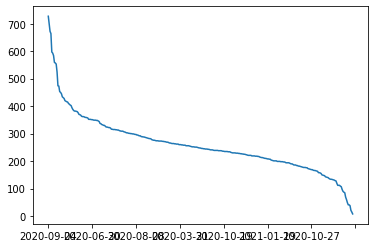

In [ ]:
pos.date.value_counts().plot()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

In [ ]:
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [ ]:
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])])
fig.show()